# Exam Project | Face Recognizer
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
from os import listdir

import cv2
import math
from matplotlib import pyplot as plt

In [2]:
sys.path.append('../')
from FaceDetector import FaceDetector

In [3]:
# load images
dad_path = '../data/face-data/PersonGroup/Family1-Dad'
paths = listdir(dad_path)
images = [cv2.imread(f'{dad_path}/{path}') for path in paths]

In [4]:
face_detector = FaceDetector('FACE_DEFAULT')
cropped_images = []

for image in images:
    crop_image = face_detector.crop(image)
    #face_image = face_detector.mark(image)
    cropped_images.append(crop_image)

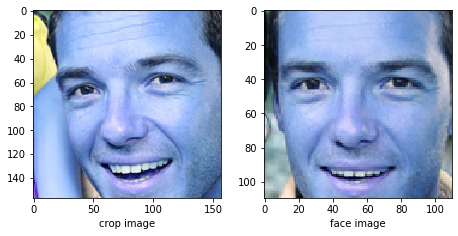

In [5]:
plt.figure(figsize=(20,20))

plt.subplot(5, 5, 1)
plt.xlabel('crop image')
plt.imshow(cropped_images[0])

plt.subplot(5, 5, 2)
plt.xlabel('face image')
plt.imshow(cropped_images[1])

plt.show()

In [28]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=10,
    horizontal_flip=True,
    fill_mode='constant'
)

In [47]:
train_images = []

for image in cropped_images:
    for i in range(10):
        generated_image = datagen.random_transform(image)
        train_images.append(generated_image)

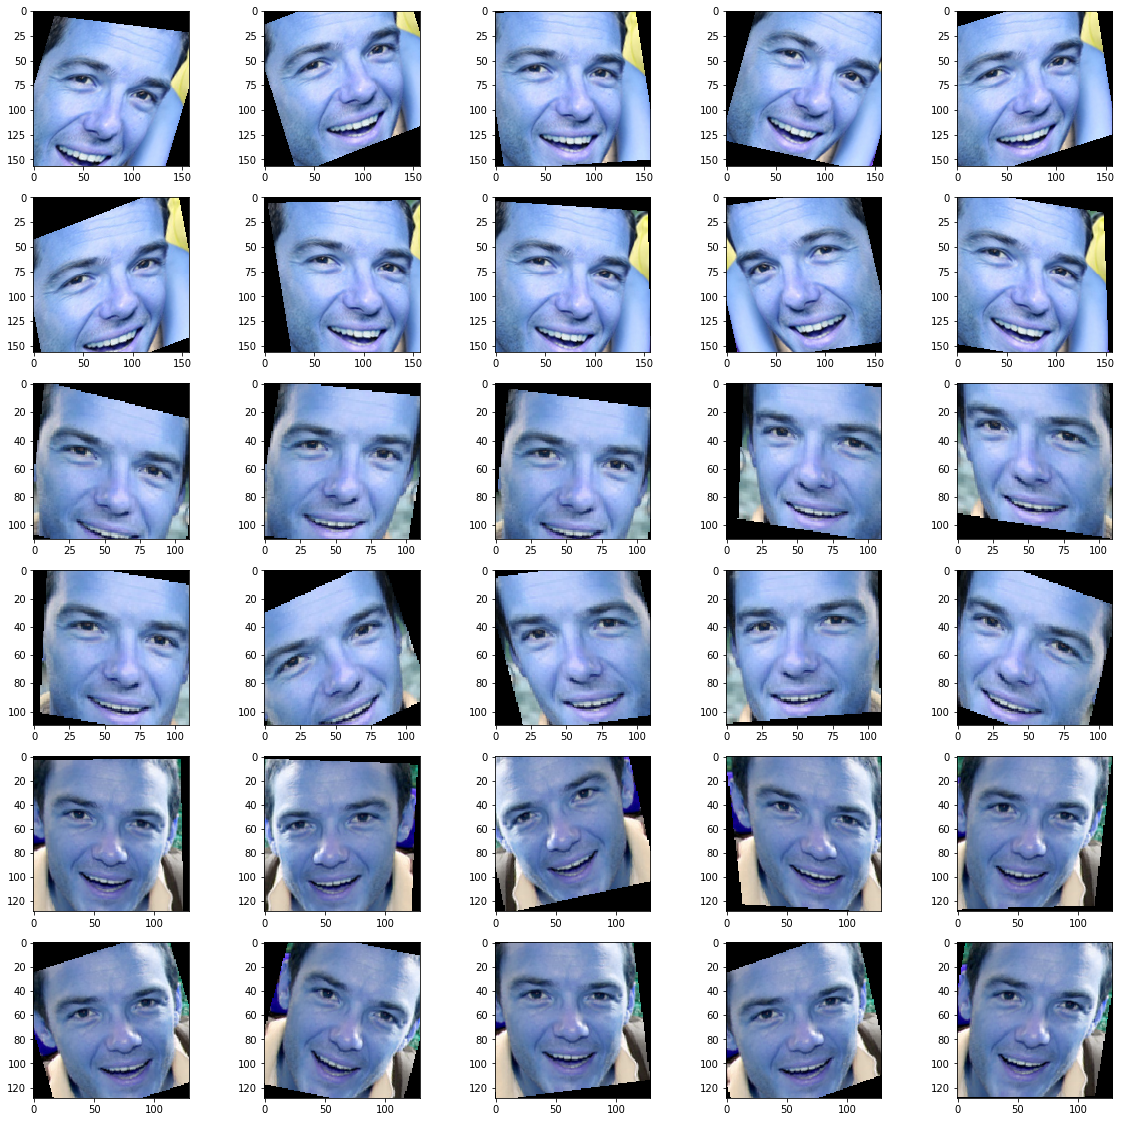

In [50]:
plt.figure(figsize=(20,20))

for index, train_image in enumerate(train_images):
    plt.subplot(6, 5, 1+index)
    plt.imshow(train_image)

plt.show()